In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rain = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/rainfall.csv')
temperature=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/temperature.csv')

In [3]:
rain.head()

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name
0,9151,Perth,1967,1,1,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant
1,9151,Perth,1967,1,2,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant
2,9151,Perth,1967,1,3,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant
3,9151,Perth,1967,1,4,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant
4,9151,Perth,1967,1,5,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant


# Rainfall

In [5]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179273 entries, 0 to 179272
Data columns (total 11 columns):
station_code    179273 non-null int64
city_name       179273 non-null object
year            179273 non-null int64
month           179273 non-null int64
day             179273 non-null int64
rainfall        167513 non-null float64
period          64476 non-null float64
quality         167509 non-null object
lat             179273 non-null float64
long            179273 non-null float64
station_name    179273 non-null object
dtypes: float64(4), int64(4), object(3)
memory usage: 15.0+ MB


In [6]:
rain.shape

(179273, 11)

In [7]:
rain['year'].unique()

array([1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 1884,
       1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895,
       1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906,
       1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917,
       1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928,
       1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939,
       1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950,
       1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961,
       1962, 1963, 1964, 1965, 1966, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 18

In [8]:
rain['Date']=pd.to_datetime(rain[['year', 'month', 'day']])
rain.head()

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name,Date
0,9151,Perth,1967,1,1,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant,1967-01-01
1,9151,Perth,1967,1,2,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant,1967-01-02
2,9151,Perth,1967,1,3,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant,1967-01-03
3,9151,Perth,1967,1,4,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant,1967-01-04
4,9151,Perth,1967,1,5,NaN,NaN,NaN,-31.96,115.79,Subiaco Wastewater Treatment Plant,1967-01-05


In [9]:
rain.sort_values('year',ascending = True)

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name,Date
95432,66062,Sydney,1858,7,1,12.7,1.0,Y,-33.86,151.21,Observatory Hill,1858-07-01
95499,66062,Sydney,1858,9,6,6.6,1.0,Y,-33.86,151.21,Observatory Hill,1858-09-06
95498,66062,Sydney,1858,9,5,0.0,NaN,Y,-33.86,151.21,Observatory Hill,1858-09-05
95497,66062,Sydney,1858,9,4,24.6,1.0,Y,-33.86,151.21,Observatory Hill,1858-09-04
95496,66062,Sydney,1858,9,3,0.0,NaN,Y,-33.86,151.21,Observatory Hill,1858-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...
158811,70351,Canberra,2020,1,4,0.0,1.0,N,-35.31,149.20,Canberra Airport,2020-01-04
158812,70351,Canberra,2020,1,5,0.0,1.0,N,-35.31,149.20,Canberra Airport,2020-01-05
95250,40913,Brisbane,2020,1,6,0.0,1.0,N,-27.48,153.04,Brisbane,2020-01-06
154423,66062,Sydney,2020,1,4,0.0,1.0,N,-33.86,151.21,Observatory Hill,2020-01-04


## Rainfall from last 50 years

In [10]:
new_df = rain.query('year>=1970')
new_df

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name,Date
1096,9151,Perth,1970,1,1,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-01
1097,9151,Perth,1970,1,2,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-02
1098,9151,Perth,1970,1,3,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-03
1099,9151,Perth,1970,1,4,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-04
1100,9151,Perth,1970,1,5,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
179268,86232,Melbourne,2020,1,2,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens,2020-01-02
179269,86232,Melbourne,2020,1,3,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens,2020-01-03
179270,86232,Melbourne,2020,1,4,0.0,NaN,N,-37.83,144.98,Melbourne Botanical Gardens,2020-01-04
179271,86232,Melbourne,2020,1,5,6.0,1.0,N,-37.83,144.98,Melbourne Botanical Gardens,2020-01-05


In [11]:
new_df.shape

(101841, 12)

In [12]:
new_df.isnull().sum()

station_code        0
city_name           0
year                0
month               0
day                 0
rainfall         9688
period          64255
quality          9692
lat                 0
long                0
station_name        0
Date                0
dtype: int64

In [13]:
import seaborn as sns

In [14]:
new_df.rainfall.mean()

2.3102232157391493

## Overall rainfall of last 50 years 

Text(0.5, 1.0, 'Rainfall of last 50 years')

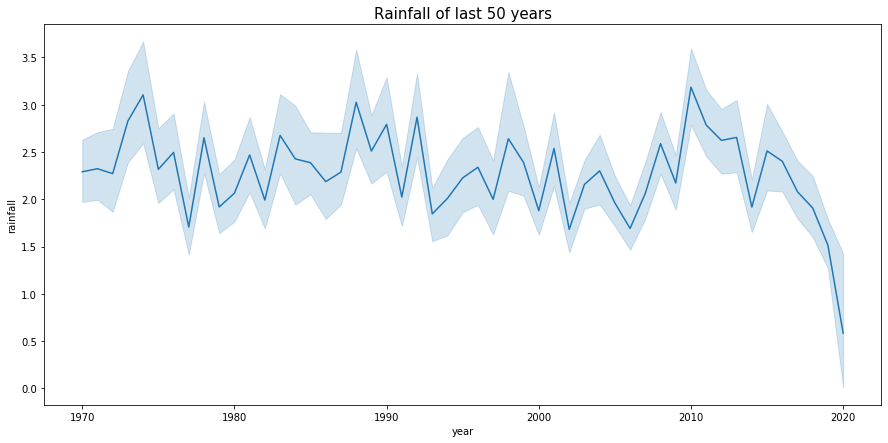

In [15]:
plt.figure(figsize = (15,7))
sns.lineplot(x=new_df['year'],y=new_df['rainfall'],palette='husl')
plt.title(("Rainfall of last 50 years"),fontsize = 15)

## Rainfall according to cities

In [16]:
sns.set(style="darkgrid")

Text(0.5, 1.0, 'Rainfall according to cities')

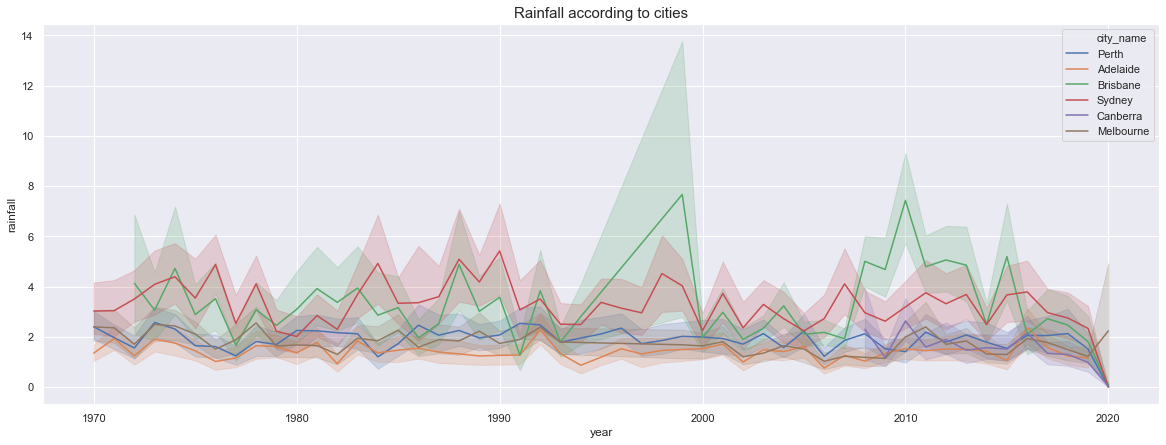

In [17]:
plt.figure(figsize=(20,7))
sns.lineplot(x="year", y="rainfall",
             hue="city_name",
             data=new_df)
plt.title(("Rainfall according to cities"),fontsize = 15)

## Average yearly rainfall

In [18]:
yearly_mean_rainfall = new_df.groupby(['year']).mean()
yearly_mean_rainfall.head()

,station_code,month,day,rainfall,period,lat,long
year,,,,,,,
1970,44967.8,6.526027,15.720548,2.290548,1.000000,-33.216,140.726
1971,44967.8,6.526027,15.720548,2.322977,1.003697,-33.216,140.726
1972,44967.8,6.513661,15.756831,2.271002,1.005780,-33.216,140.726
1973,44967.8,6.526027,15.720548,2.827405,1.009820,-33.216,140.726
1974,44967.8,6.526027,15.720548,3.104206,1.030252,-33.216,140.726


Text(0.5, 1.0, 'Average yearly rainfall')

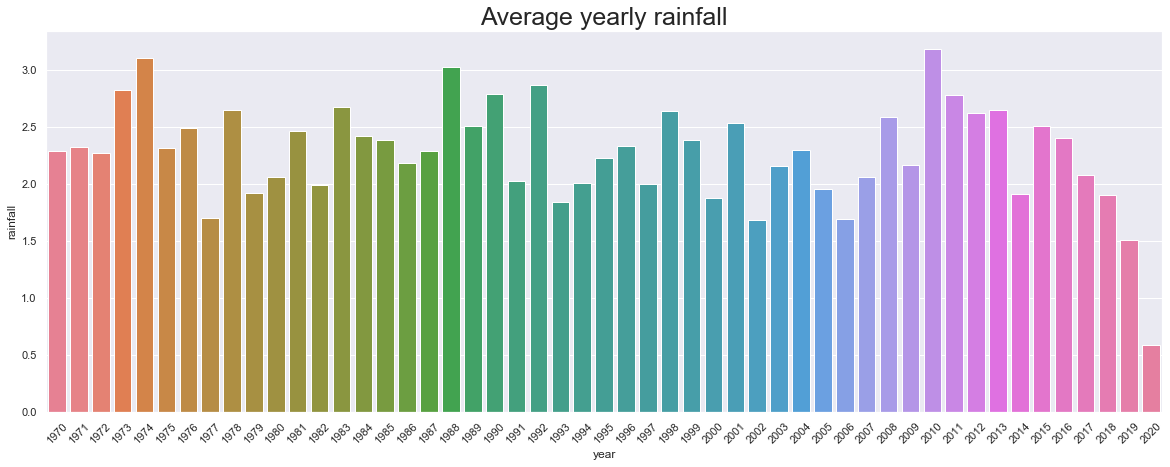

In [19]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall.index, data = yearly_mean_rainfall,palette = 'husl')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall"),fontsize = 25)

In [20]:
perth = new_df[new_df['city_name']=='Perth']
perth

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name,Date
1096,9151,Perth,1970,1,1,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-01
1097,9151,Perth,1970,1,2,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-02
1098,9151,Perth,1970,1,3,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-03
1099,9151,Perth,1970,1,4,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-04
1100,9151,Perth,1970,1,5,0.0,NaN,Y,-31.96,115.79,Subiaco Wastewater Treatment Plant,1970-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
19355,9151,Perth,2019,12,29,0.0,NaN,N,-31.96,115.79,Subiaco Wastewater Treatment Plant,2019-12-29
19356,9151,Perth,2019,12,30,0.0,NaN,N,-31.96,115.79,Subiaco Wastewater Treatment Plant,2019-12-30
19357,9151,Perth,2019,12,31,0.0,NaN,N,-31.96,115.79,Subiaco Wastewater Treatment Plant,2019-12-31
19358,9151,Perth,2020,1,1,0.0,NaN,N,-31.96,115.79,Subiaco Wastewater Treatment Plant,2020-01-01


In [21]:
yearly_mean_rainfall_perth = perth.groupby(['year']).mean()
yearly_mean_rainfall_perth.head()

,station_code,month,day,rainfall,period,lat,long
year,,,,,,,
1970,9151.0,6.526027,15.720548,2.397534,1.000,-31.96,115.79
1971,9151.0,6.526027,15.720548,1.966209,1.008,-31.96,115.79
1972,9151.0,6.513661,15.756831,1.553552,1.000,-31.96,115.79
1973,9151.0,6.526027,15.720548,2.571257,1.000,-31.96,115.79
1974,9151.0,6.526027,15.720548,2.308767,1.000,-31.96,115.79


Text(0.5, 1.0, 'Average yearly rainfall in Perth')

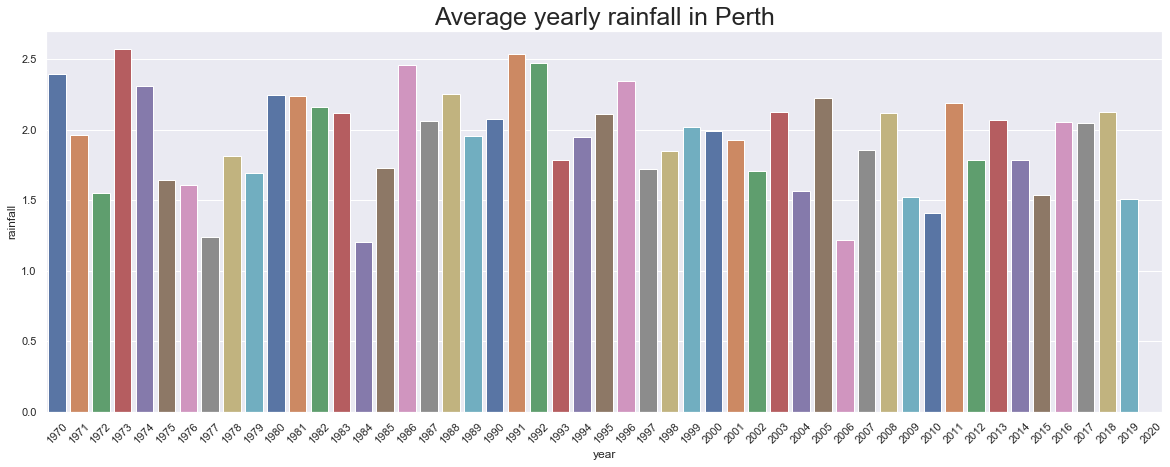

In [22]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_perth.index, data = yearly_mean_rainfall_perth,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Perth"),fontsize = 25)

In [23]:
Adelaide = new_df[new_df['city_name']=='Adelaide']

In [24]:
yearly_mean_rainfall_Adelaide= Adelaide.groupby(['year']).mean()

Text(0.5, 1.0, 'Average yearly rainfall in Adelaide')

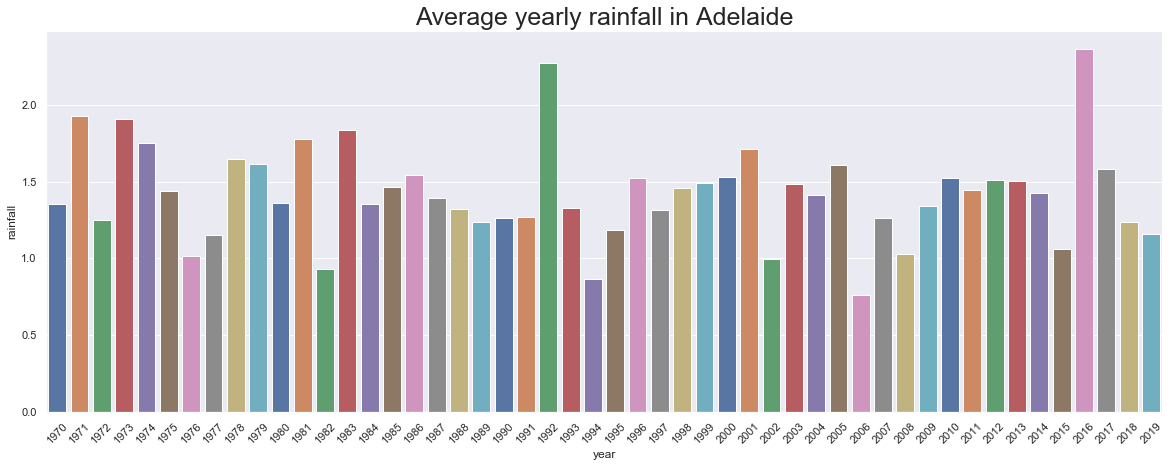

In [25]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_Adelaide.index, data = yearly_mean_rainfall_Adelaide,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Adelaide"),fontsize = 25)

In [26]:
Brisbane = new_df[new_df['city_name']=='Brisbane']

In [27]:
yearly_mean_rainfall_Brisbane= Brisbane.groupby(['year']).mean()

Text(0.5, 1.0, 'Average yearly rainfall in Brisbane')

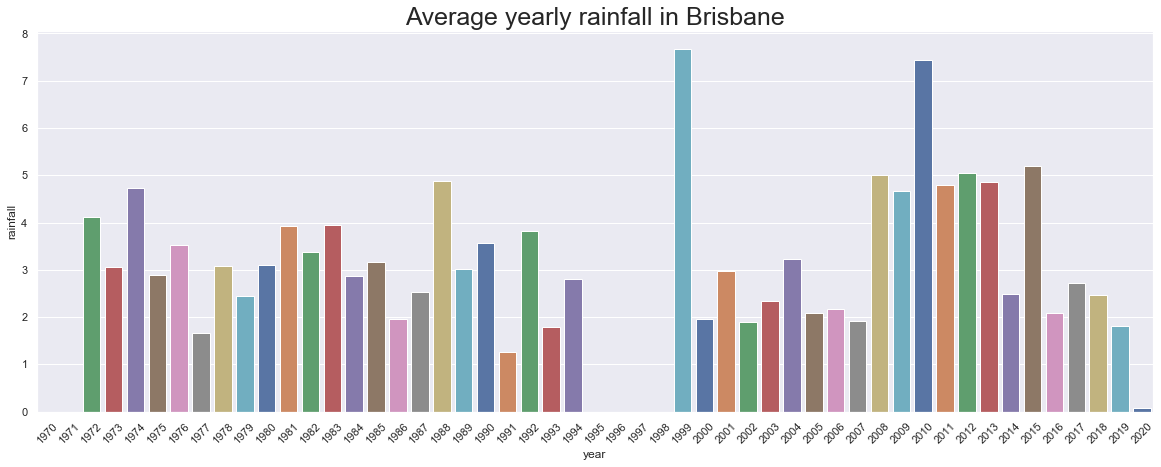

In [28]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_Brisbane.index, data = yearly_mean_rainfall_Brisbane,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Brisbane"),fontsize = 25)

In [29]:
Sydney = new_df[new_df['city_name']=='Sydney']

In [30]:
yearly_mean_rainfall_Sydney= Sydney.groupby(['year']).mean()

Text(0.5, 1.0, 'Average yearly rainfall in Sydney')

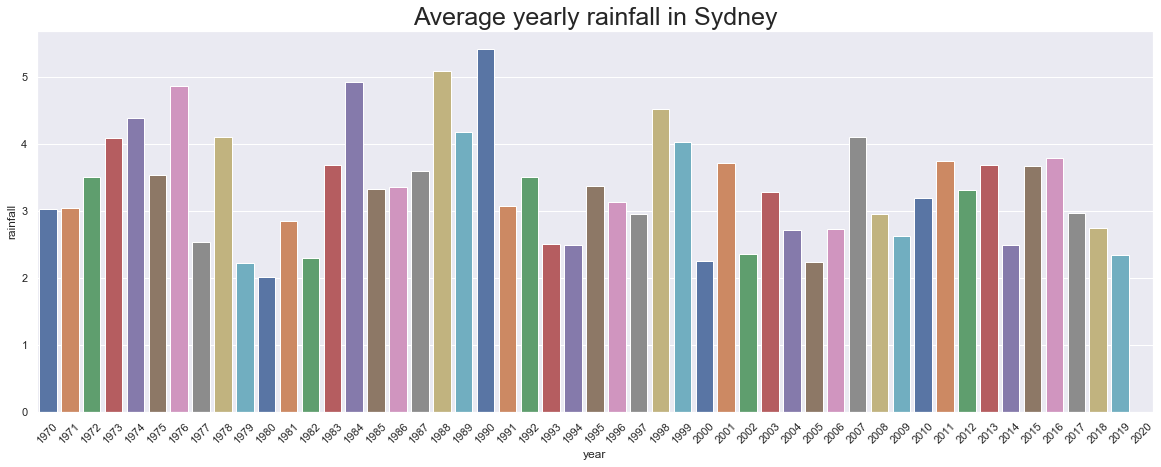

In [31]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_Sydney.index, data = yearly_mean_rainfall_Sydney,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Sydney"),fontsize = 25)

In [32]:
Canberra = new_df[new_df['city_name']=='Canberra']
Canberra.head()

,station_code,city_name,year,month,day,rainfall,period,quality,lat,long,station_name,Date
154425,70351,Canberra,2008,1,1,NaN,NaN,NaN,-35.31,149.2,Canberra Airport,2008-01-01
154426,70351,Canberra,2008,1,2,NaN,NaN,NaN,-35.31,149.2,Canberra Airport,2008-01-02
154427,70351,Canberra,2008,1,3,NaN,NaN,NaN,-35.31,149.2,Canberra Airport,2008-01-03
154428,70351,Canberra,2008,1,4,NaN,NaN,NaN,-35.31,149.2,Canberra Airport,2008-01-04
154429,70351,Canberra,2008,1,5,NaN,NaN,NaN,-35.31,149.2,Canberra Airport,2008-01-05


In [33]:
yearly_mean_rainfall_Canberra= Canberra.groupby(['year']).mean()

Text(0.5, 1.0, 'Average yearly rainfall in Canberra')

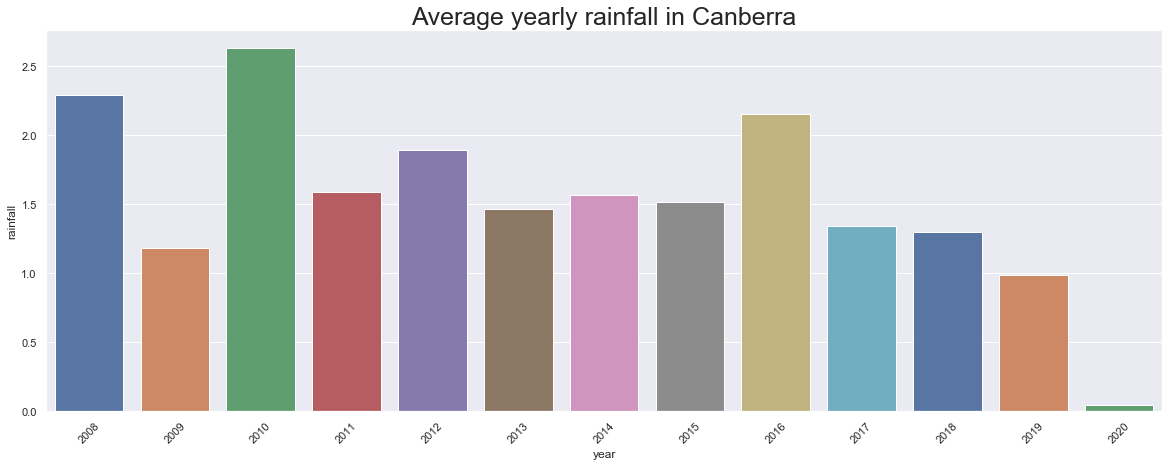

In [34]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_Canberra.index, data = yearly_mean_rainfall_Canberra,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Canberra"),fontsize = 25)

In [35]:
Melbourne = new_df[new_df['city_name']=='Melbourne']

In [36]:
yearly_mean_rainfall_Melbourne= Melbourne.groupby(['year']).mean()

Text(0.5, 1.0, 'Average yearly rainfall in Melbourne')

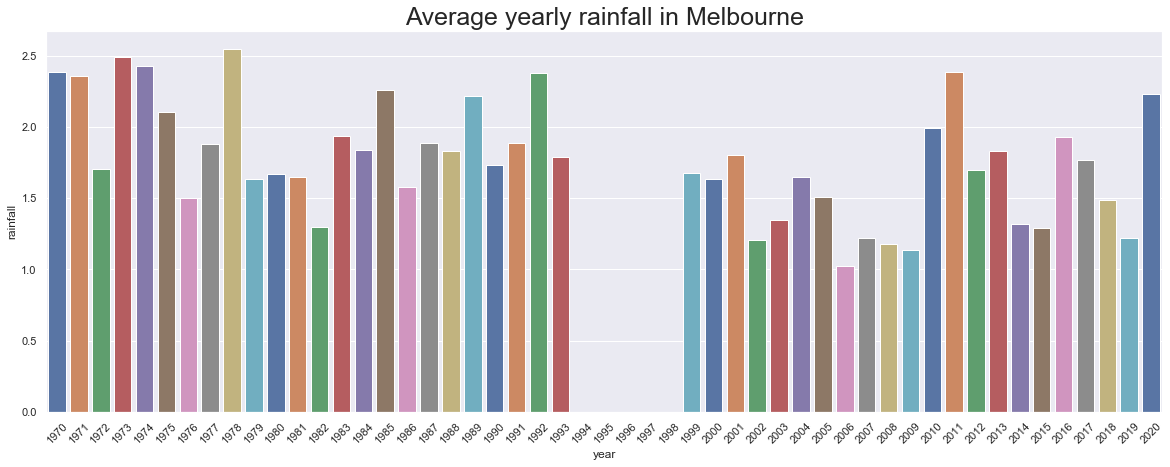

In [37]:
plt.figure(figsize = (20,7))
sns.barplot(y="rainfall",x=yearly_mean_rainfall_Melbourne.index, data = yearly_mean_rainfall_Melbourne,palette = 'deep')
plt.xticks(rotation = 45)
plt.title(("Average yearly rainfall in Melbourne"),fontsize = 25)

## Monthly Rainfall in year 1970 and 2019

In [61]:
rainfall_1970 = new_df[new_df['year']==1970]

In [62]:
rainfall_2019 = new_df[new_df['year']==2019]

Text(0.5, 1.0, 'rainfall in 1970')

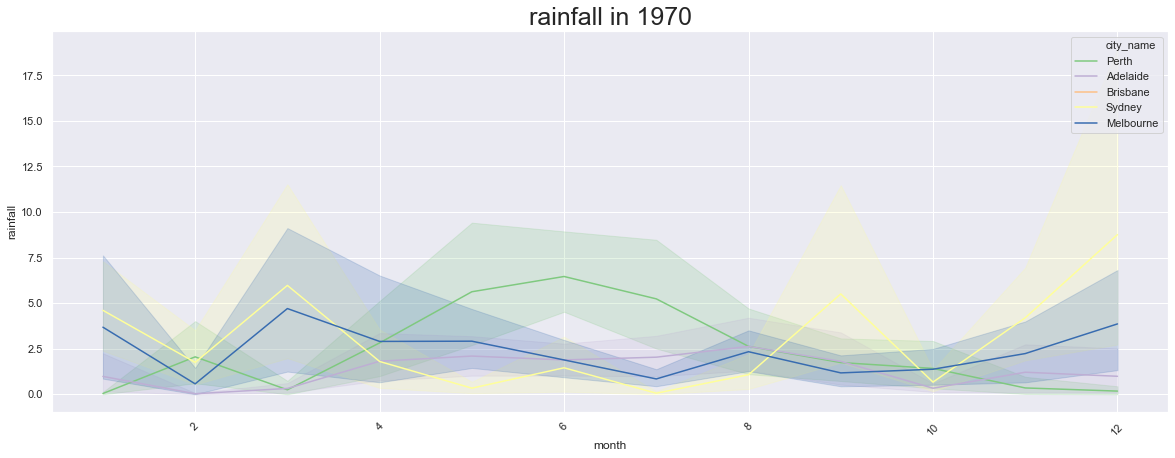

In [74]:
plt.figure(figsize = (20,7))
sns.lineplot(y="rainfall",x='month', data = rainfall_1970,hue = 'city_name',palette = 'Accent')
plt.xticks(rotation = 45)
plt.title(("rainfall in 1970"),fontsize = 25)

Text(0.5, 1.0, 'rainfall in 2019')

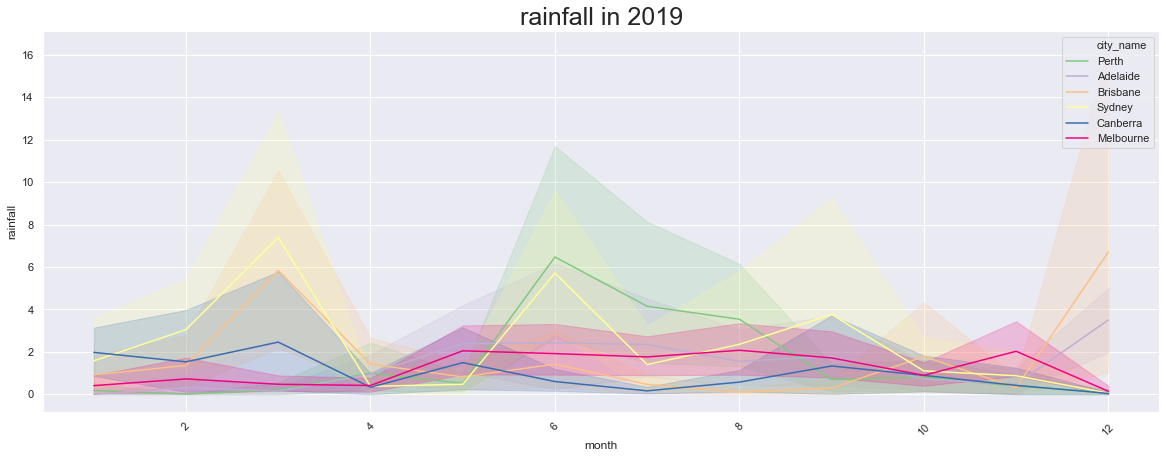

In [73]:
plt.figure(figsize = (20,7))
sns.lineplot(y="rainfall",x='month', data = rainfall_2019,hue='city_name',palette = 'Accent')
plt.xticks(rotation = 45)
plt.title(("rainfall in 2019"),fontsize = 25)

# Temperature

In [88]:
temp=pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-07/temperature.csv')

In [89]:
temp.head()

,city_name,date,temperature,temp_type,site_name
0,PERTH,1910-01-01,26.7,max,PERTH AIRPORT
1,PERTH,1910-01-02,27.0,max,PERTH AIRPORT
2,PERTH,1910-01-03,27.5,max,PERTH AIRPORT
3,PERTH,1910-01-04,24.0,max,PERTH AIRPORT
4,PERTH,1910-01-05,24.8,max,PERTH AIRPORT


In [90]:
temp['temp_type'].value_counts()

min    264139
max    264139
Name: temp_type, dtype: int64

In [91]:
temp.shape

(528278, 5)

In [79]:
import datetime

In [92]:
temp['date'] = pd.to_datetime(temp['date'])

In [93]:
temp['year'] = temp['date'].dt.year
temp['month'] = temp['date'].dt.month
temp['day'] = temp['date'].dt.day

In [94]:
temp.head()

,city_name,date,temperature,temp_type,site_name,year,month,day
0,PERTH,1910-01-01,26.7,max,PERTH AIRPORT,1910,1,1
1,PERTH,1910-01-02,27.0,max,PERTH AIRPORT,1910,1,2
2,PERTH,1910-01-03,27.5,max,PERTH AIRPORT,1910,1,3
3,PERTH,1910-01-04,24.0,max,PERTH AIRPORT,1910,1,4
4,PERTH,1910-01-05,24.8,max,PERTH AIRPORT,1910,1,5


In [95]:
temp['year'].unique()

array([1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920,
       1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

In [96]:
temp['city_name'].unique()

array(['PERTH', 'PORT', 'KENT', 'BRISBANE', 'SYDNEY', 'CANBERRA',
       'MELBOURNE'], dtype=object)

Text(0.5, 1.0, 'Overall Temperature')

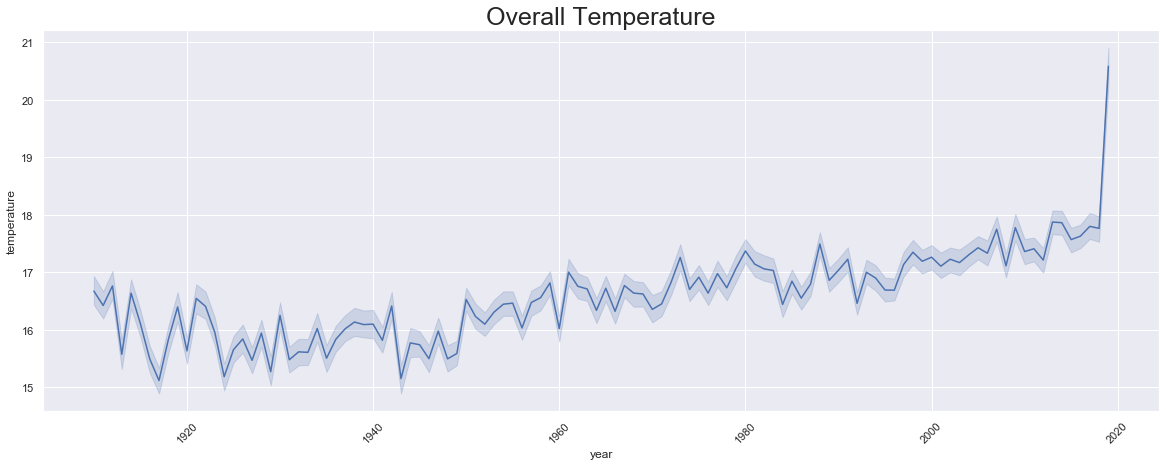

In [97]:
plt.figure(figsize = (20,7))
sns.lineplot(y="temperature",x='year', data = temp,palette = 'Accent')
plt.xticks(rotation = 45)
plt.title(("Overall Temperature"),fontsize = 25)

## Overall Temperature in cities

Text(0.5, 1.0, 'Overall Temperature according to cities')

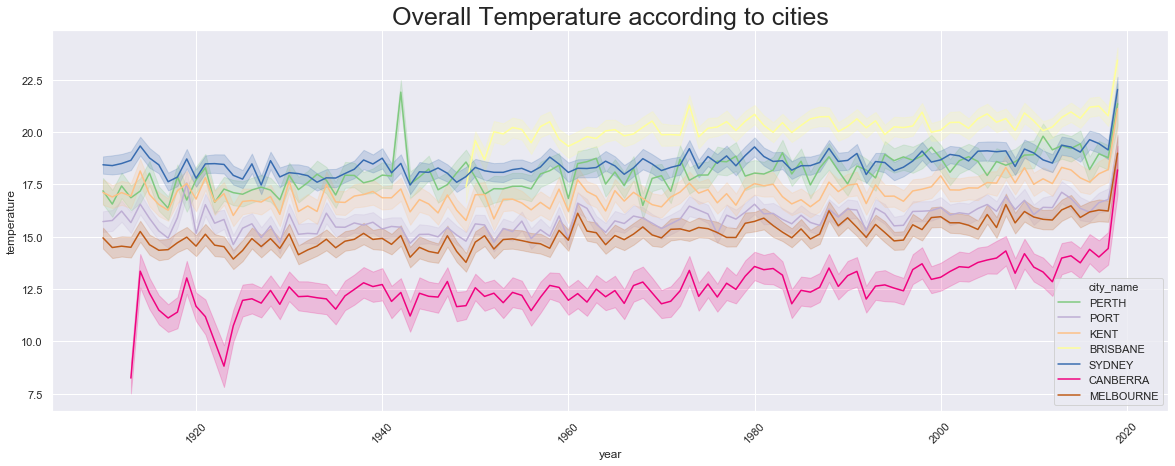

In [98]:
plt.figure(figsize = (20,7))
sns.lineplot(y="temperature",x='year', data = temp,hue = 'city_name',palette = 'Accent')
plt.xticks(rotation = 45)
plt.title(("Overall Temperature according to cities"),fontsize = 25)

In [99]:
yearly_mean_temp = temp.groupby(['year']).mean()
yearly_mean_temp.head()

,temperature,month,day
year,,,
1910,16.668202,6.535126,15.744786
1911,16.418294,6.526027,15.720548
1912,16.758347,6.513661,15.756831
1913,15.569085,6.738255,15.783797
1914,16.632350,6.526027,15.720548


Text(0.5, 1.0, 'Average yearly temperature')

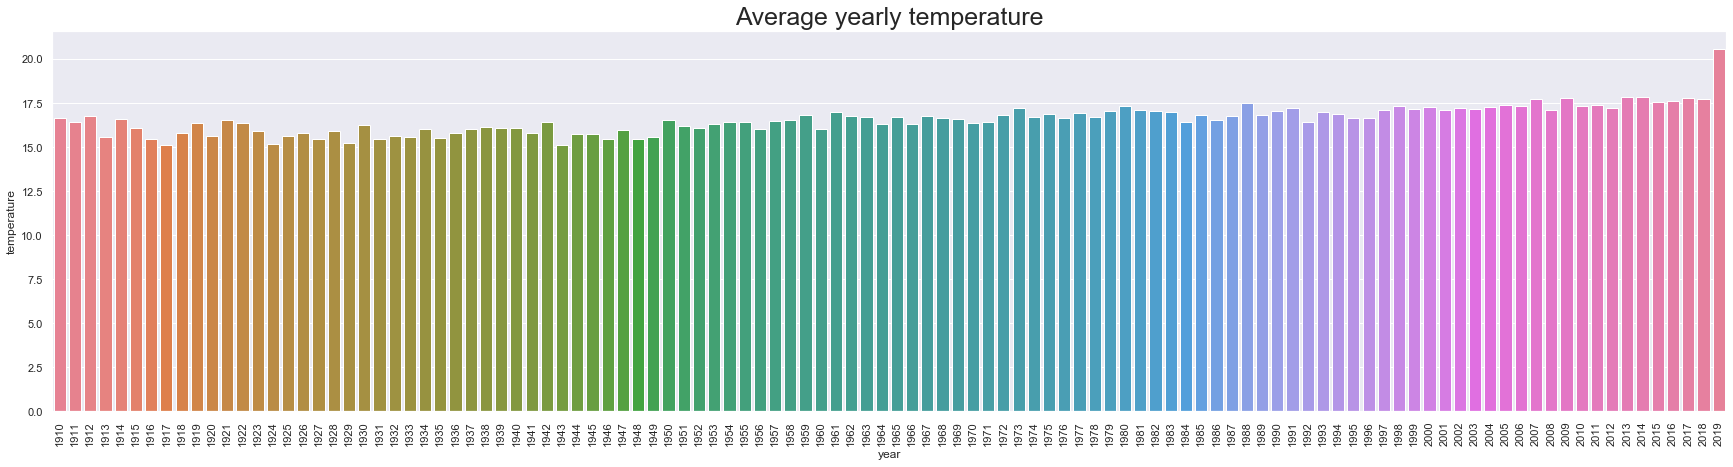

In [102]:
plt.figure(figsize = (30,7))
sns.barplot(y="temperature",x=yearly_mean_temp.index, data = yearly_mean_temp,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Average yearly temperature"),fontsize = 25)

In [108]:
perth = temp[temp['city_name']=='PERTH']
PORT = temp[temp['city_name']=='PORT'] 
KENT = temp[temp['city_name']=='KENT']  
BRISBANE = temp[temp['city_name']=='BRISBANE'] 
SYDNEY = temp[temp['city_name']=='SYDNEY']
CANBERRA = temp[temp['city_name']=='CANBERRA']
MELBOURNE = temp[temp['city_name']=='MELBOURNE']

Text(0.5, 1.0, 'Overall temperature in MELBOURNE')

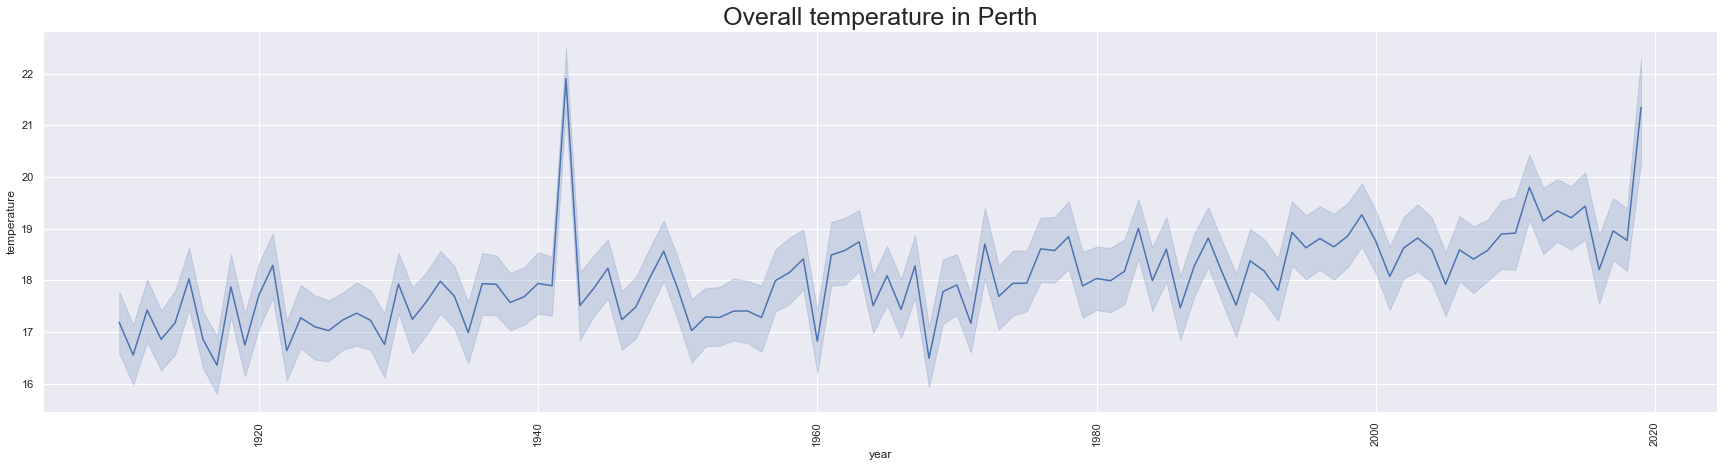

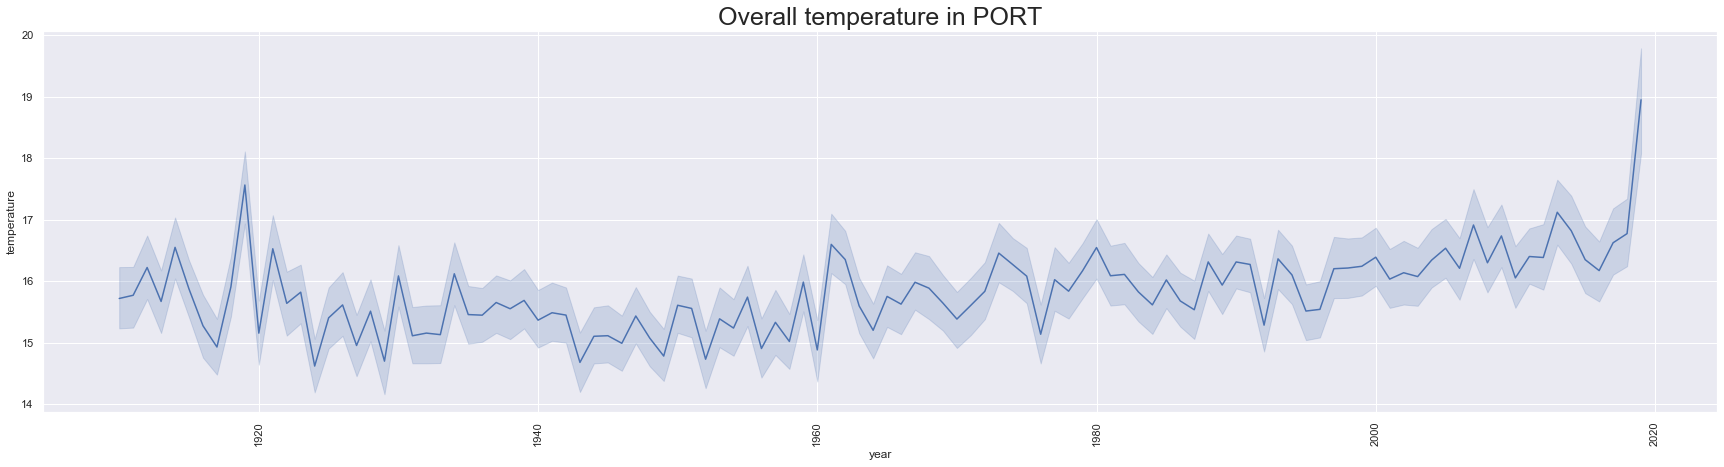

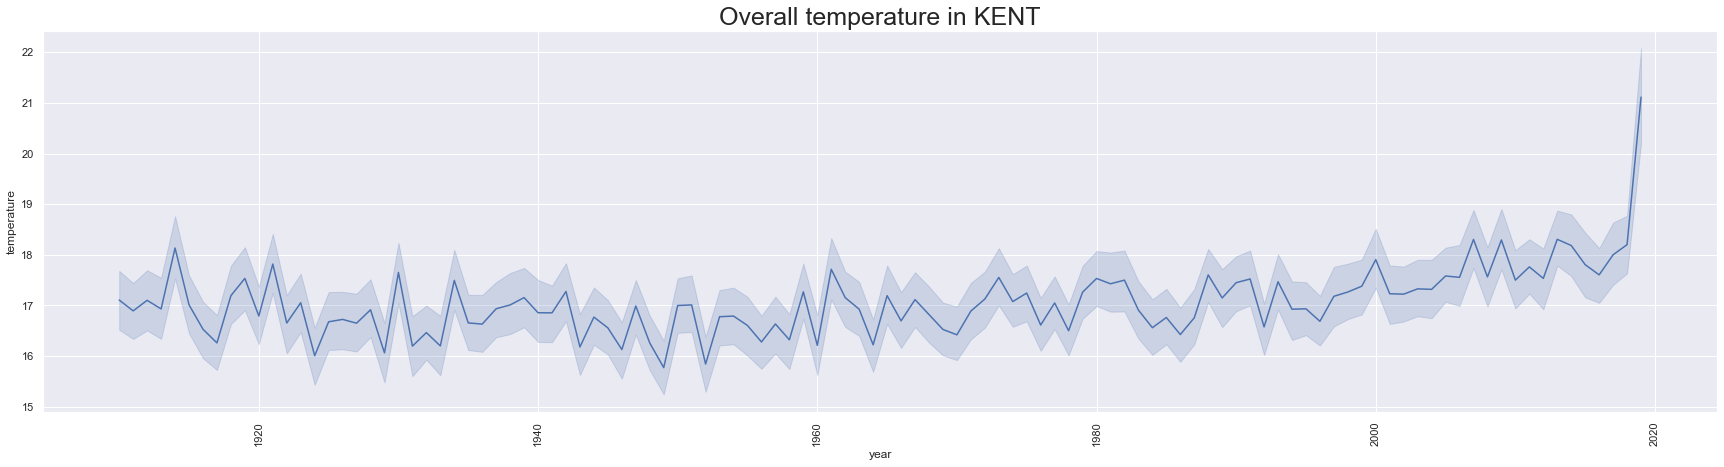

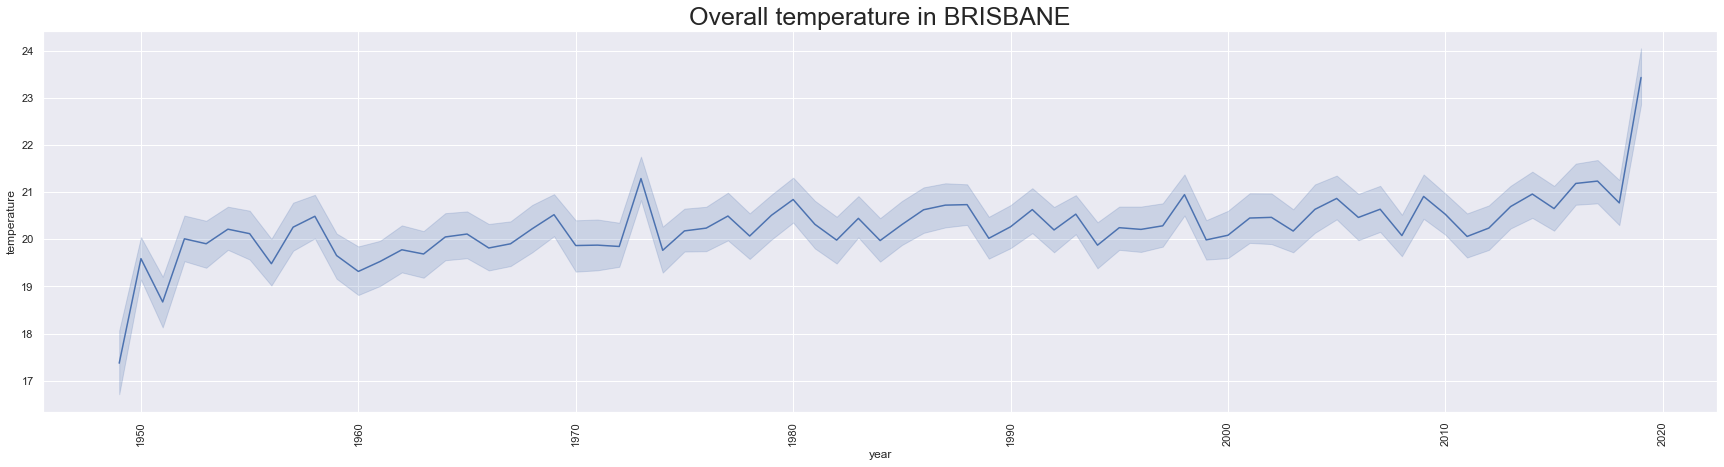

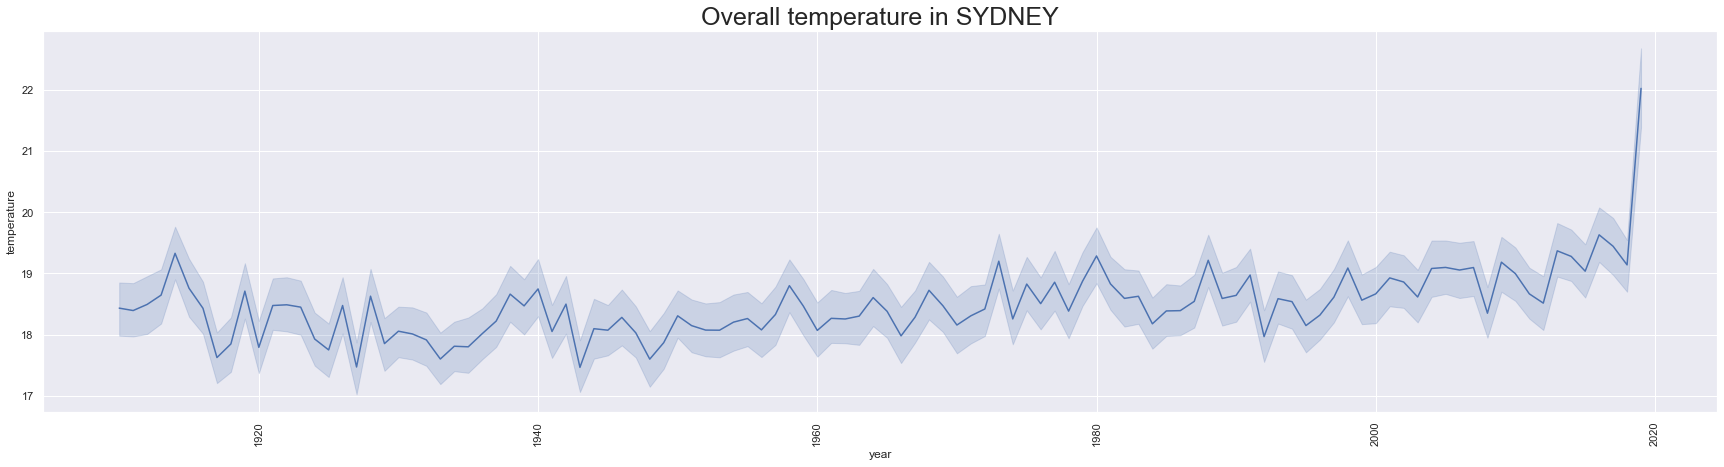

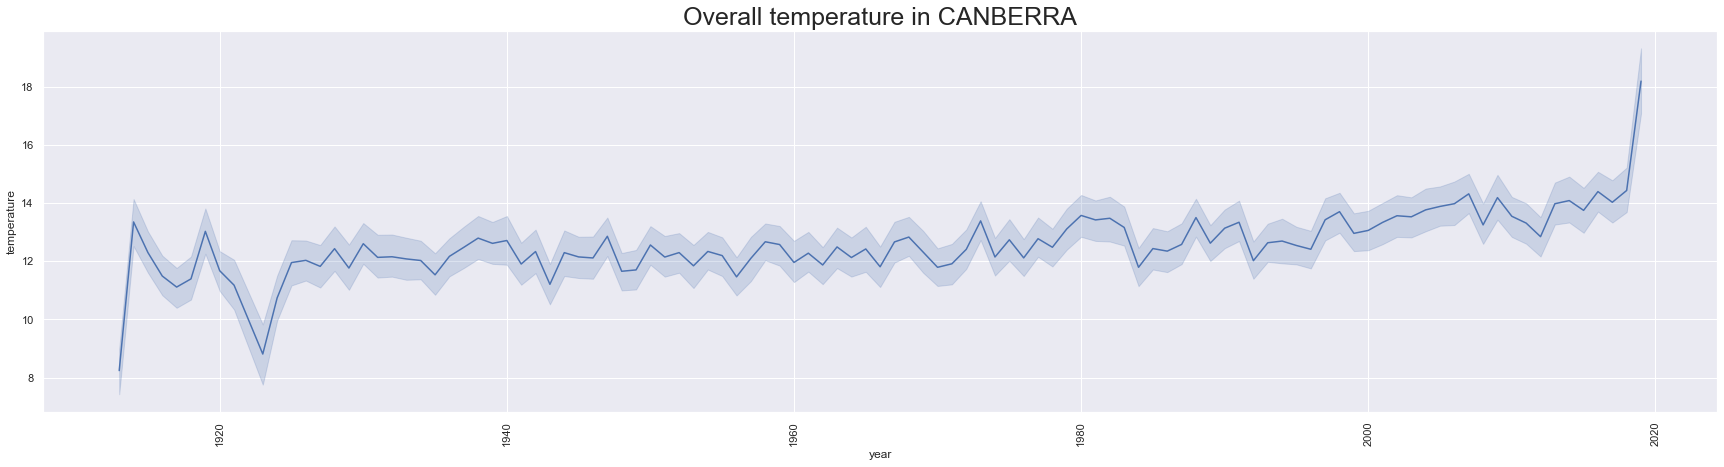

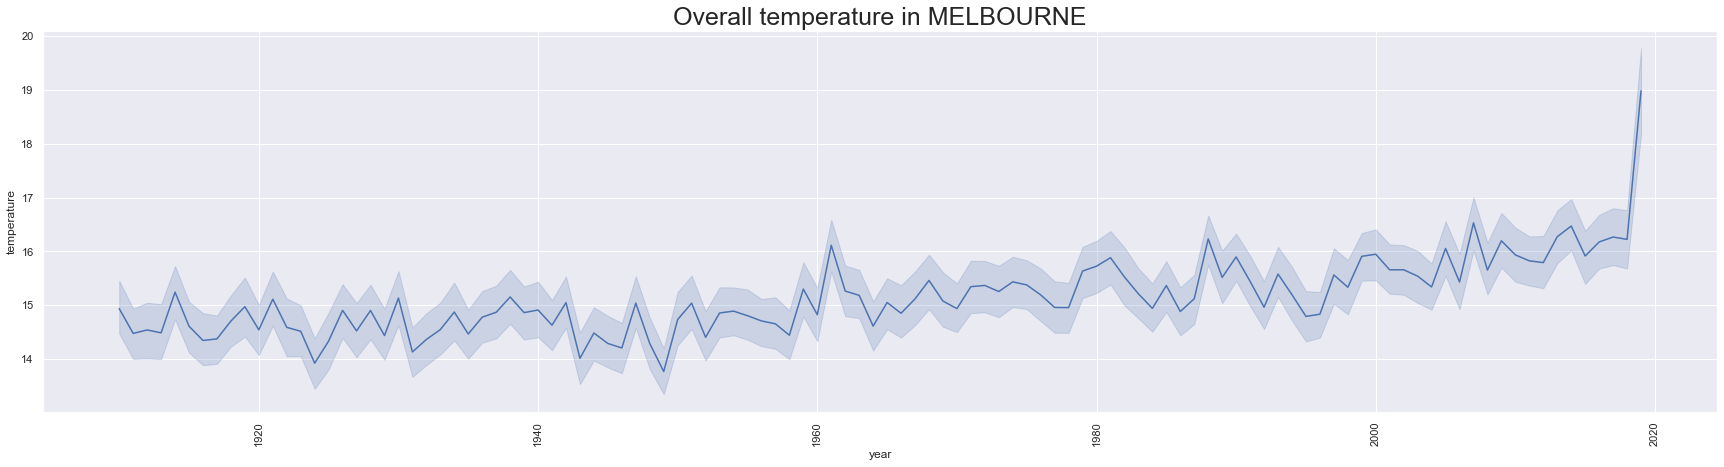

In [110]:
plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = perth,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in Perth"),fontsize = 25)
 
plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = PORT,palette = 'BrBg')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in PORT"),fontsize = 25)

plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = KENT,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in KENT"),fontsize = 25)

plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = BRISBANE,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in BRISBANE"),fontsize = 25)

plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = SYDNEY,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in SYDNEY"),fontsize = 25)

plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = CANBERRA,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in CANBERRA"),fontsize = 25)

plt.figure(figsize = (30,7))
sns.lineplot(y="temperature",x='year', data = MELBOURNE ,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Overall temperature in MELBOURNE"),fontsize = 25)

## Maximum and minimum temperature

In [112]:
max_temp = temp[temp['temp_type']=='max']
min_temp = temp[temp['temp_type']=='min']

In [119]:
avg_max_temp_yearly = max_temp.groupby(['year']).mean()
avg_min_temp_yearly = min_temp.groupby(['year']).mean()

Text(0.5, 1.0, 'Average of minimum and maximum temperature according to year')

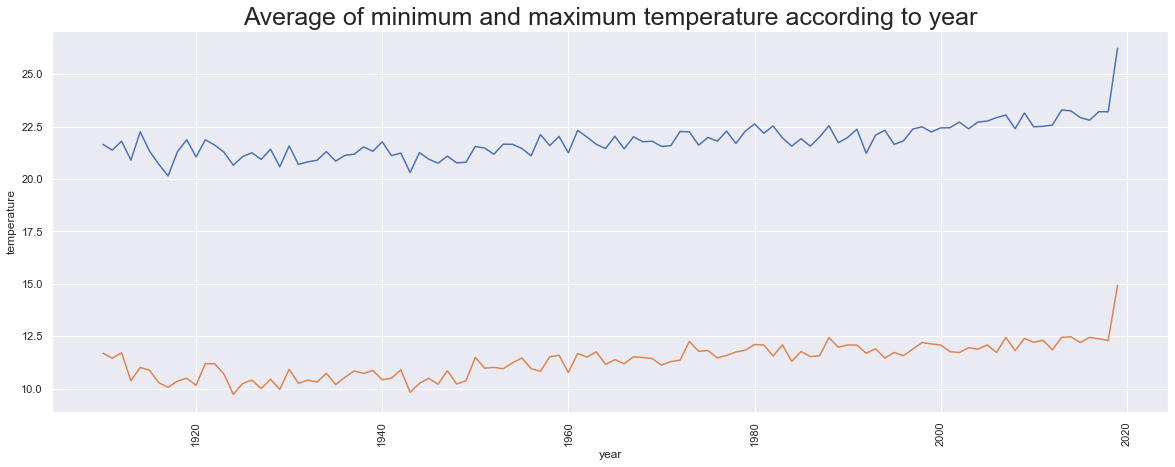

In [122]:
fig1 = plt.figure(figsize = (20,7))
ax1 = fig1.add_subplot(111)


sns.lineplot(y="temperature",x=avg_max_temp_yearly.index, data = avg_max_temp_yearly,palette = 'husl')
plt.xticks(rotation = 90)


sns.lineplot(y="temperature",x=avg_min_temp_yearly.index, data = avg_min_temp_yearly,palette = 'husl')
plt.xticks(rotation = 90)
plt.title(("Average of minimum and maximum temperature according to year"),fontsize = 25)

In [127]:
temp_1970 = temp[temp['year']==1970]
temp_2019 = temp[temp['year']==2019]

Text(0.5, 1.0, 'Difference between the temperatures of year 1910 and 2019')

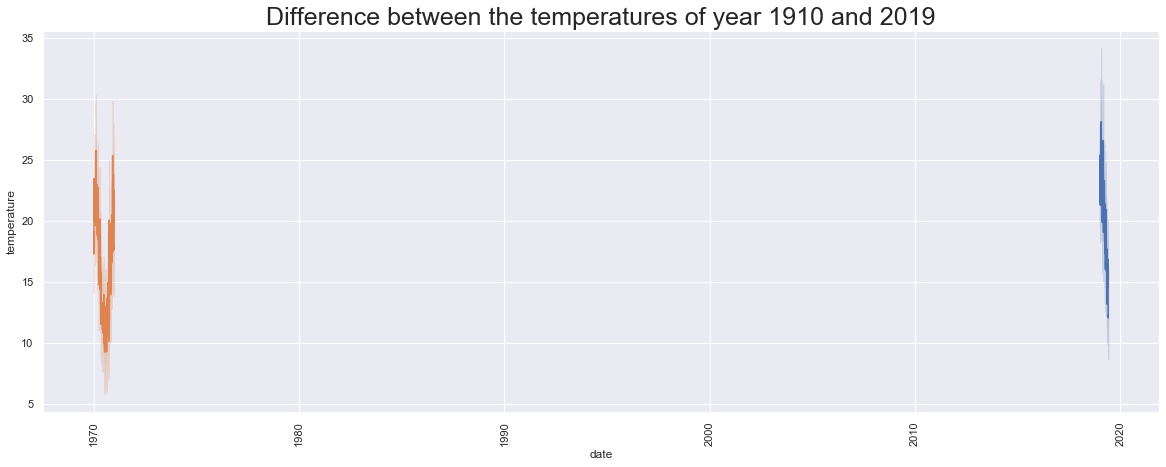

In [129]:
fig1 = plt.figure(figsize = (20,7))
ax1 = fig1.add_subplot(111)


sns.lineplot(y="temperature",x='date', data = temp_2019,palette = 'husl')
plt.xticks(rotation = 90)


sns.lineplot(y="temperature",x='date', data = temp_1970,palette = 'husl')
plt.xticks(rotation = 90)

plt.title(("Difference between the temperatures of year 1910 and 2019"),fontsize = 25)